# Calibration Vega

In [48]:
import os
import numpy as np

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [50]:
import pysynphot as S

# To force the detector surface
https://pysynphot.readthedocs.io/en/latest/ref_api.html#pysynphot.refs.setref

In [51]:
 S.refs.showref()

graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
      area: 1
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True


In [52]:
S.refs.setref(area=1) # set by default to 1 cm2

In [53]:
 S.refs.showref()

graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
      area: 1
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True


In [54]:
pysynphot_root_path=os.environ['PYSYN_CDBS']

In [55]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

In [56]:
XMIN=3000.
XMAX=11000.

# Set the primary mirror surface by default

In [93]:
#D=120.0 # Diameter in cm
#S.primary_area=np.pi*D**2/4
#S.refs.setref(area=np.pi*D**2/4) # set by default to 1 cm2

In [95]:
#S.refs.showref()

# Constants

$$
    m_{AB} = -2.5 \times \log_{10} \left( \frac{f_\nu}{3631 Jy} \right) 
$$

$$
   1 Jy = 10^{−26} W . Hz^{−1} . m^{−2} = 10^{−23} erg . s^{−1} . Hz^{−1} . cm^{−2} 
$$

$$
     m_{AB} = -2.5 \times \log_{10} \left( \frac{f_\nu}{1 Jy} \right) + 8.5
$$

$$
     m_{AB} = -2.5 \times \log_{10} ( f_\nu ) - 48.6
$$

When $f_\nu$ is expressed in  $erg.s^{−1}.cm^{−2} . Hz^{−1}$

In [59]:
S.units.ABZERO

-48.6

In [60]:
S.units.STZERO

-21.1

In [61]:
# Angstrom per second
S.units.C

2.99792458e+18

In [62]:
# erg.s
S.units.H

6.6262e-27

# SED in flam Units:

  $$ 
  erg/s/cm^2/A 
  $$

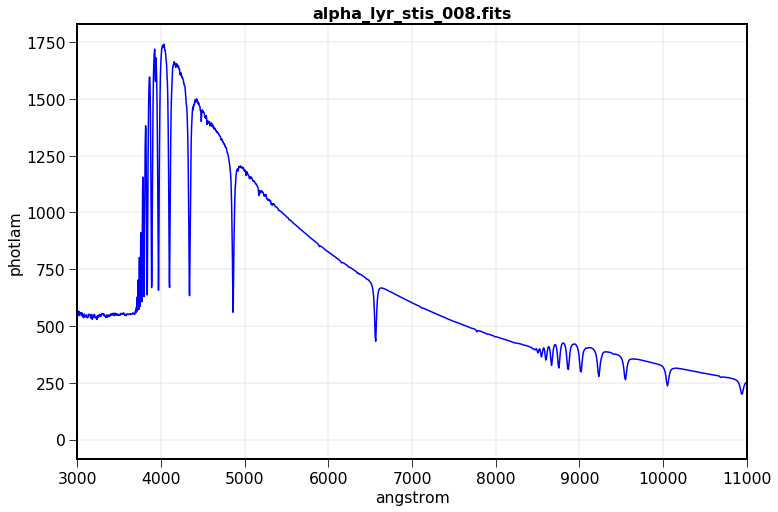

In [63]:
spec_vega=S.Vega
#spec_vega.convert("nm")

plt.plot(spec_vega.wave, spec_vega.flux,"b-")
plt.xlabel(spec_vega.waveunits)
plt.ylabel(spec_vega.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()

# SED in Vega Units:

$$
 M= −2.5 \times \log(flux/flux_{Vega})
$$

In [64]:
spec_vega.convert("vegamag")

/Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/units.py:913: RuntimeWarning: invalid value encountered in true_divide
  normalized = flux / resampled._fluxtable


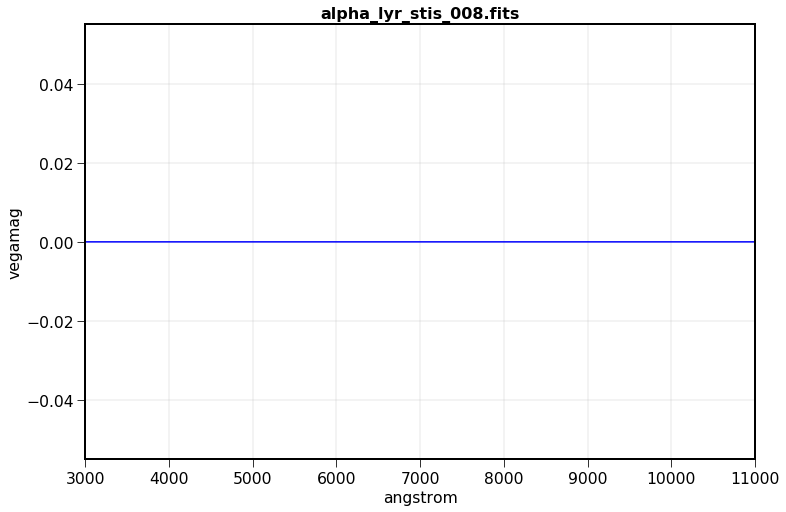

In [65]:
plt.plot(spec_vega.wave, spec_vega.flux,"b-")
plt.xlabel(spec_vega.waveunits)
plt.ylabel(spec_vega.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()

# SED in photlam Units:

  $$ 
  photons/s/cm^2/A
  $$

In [66]:
spec_vega.convert("photlam")

flat_nu = S.FlatSpectrum(0, fluxunits='abmag')
flat_lambda=S.FlatSpectrum(0, fluxunits='stmag')

flat_nu.convert("photlam")
flat_lambda.convert("photlam")

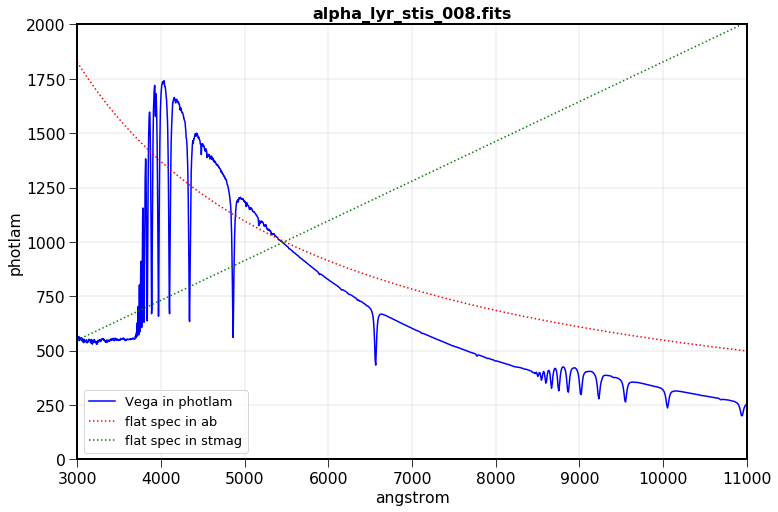

In [67]:

plt.plot(spec_vega.wave, spec_vega.flux,"b-",label="Vega in photlam")
plt.xlabel(spec_vega.waveunits)
plt.ylabel(spec_vega.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.ylim(0,2000)
plt.grid()

plt.plot(flat_nu.wave,flat_nu.flux,"r:",label="flat spec in ab")
plt.plot(flat_lambda.wave,flat_lambda.flux,"g:",label="flat spec in stmag")

plt.legend()

# Observation

https://pysynphot.readthedocs.io/en/latest/units.html

In [68]:
bp_v = S.ObsBandpass('johnson,v')
bp_u = S.ObsBandpass('johnson,u')
bp_b = S.ObsBandpass('johnson,b')
bp_r = S.ObsBandpass('johnson,r')
bp_i = S.ObsBandpass('johnson,i')

In [69]:
obs_v = S.Observation(spec_vega, bp_v)
obs_u = S.Observation(spec_vega, bp_u)
obs_b = S.Observation(spec_vega, bp_b)
obs_r = S.Observation(spec_vega, bp_r)
obs_i = S.Observation(spec_vega, bp_i)

(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


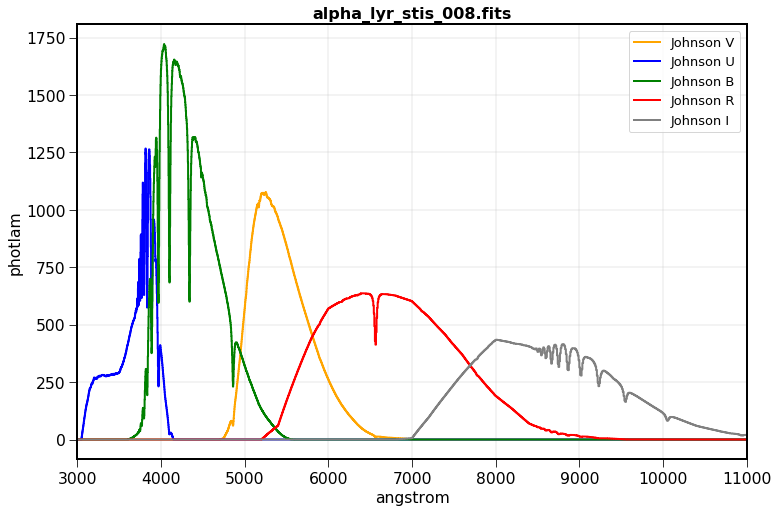

In [70]:
plt.plot(obs_v.binwave, obs_v.binflux, drawstyle='steps-mid',color="orange",lw=2,label="Johnson V")
plt.plot(obs_u.binwave, obs_u.binflux, drawstyle='steps-mid',color="blue",lw=2,label="Johnson U")
plt.plot(obs_b.binwave, obs_b.binflux, drawstyle='steps-mid',color="green",lw=2,label="Johnson B")
plt.plot(obs_r.binwave, obs_r.binflux, drawstyle='steps-mid',color="red",lw=2,label="Johnson R")
plt.plot(obs_i.binwave, obs_i.binflux, drawstyle='steps-mid',color="grey",lw=2,label="Johnson I")
plt.xlabel(obs_v.waveunits)
plt.ylabel(obs_v.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()
plt.legend()

In [96]:
print(obs_v.primary_area)

None


In [97]:
obs_v.convert('counts')

In [98]:
obs_v.countrate()

9617382858.764801

In [99]:
obs_b.countrate()

14277147262.344887

In [100]:
obs_u.countrate()

5008891523.508499

# Perfect filters

In [101]:
filt_wlcenter=np.arange(3500,10500,500)

In [102]:
delta_W=10

In [103]:
filt_wlcenter

array([ 3500,  4000,  4500,  5000,  5500,  6000,  6500,  7000,  7500,
        8000,  8500,  9000,  9500, 10000])

In [104]:
NBWL=len(filt_wlcenter)

In [105]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBWL)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBWL), alpha=1)

In [106]:
all_bp=[]
all_obs=[]
for wl in filt_wlcenter:
    thebp= bp = S.Box(wl, delta_W)
    theobs=S.Observation(spec_vega,thebp)
    all_bp.append(thebp)
    all_obs.append(theobs)

(<pysynphot.spectrum.Box object at 0x1109e3f10>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x1200c1050>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x120f1ca90>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x1219c38d0>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x1219d1ad0>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x1219c2490>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x121dd9810>) does not have a defined binset in the w

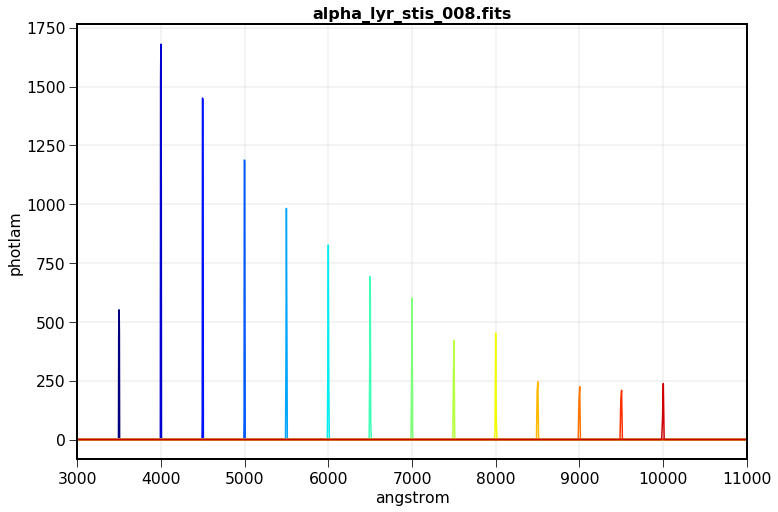

In [107]:
idx=0
for theobs in all_obs:
    plt.plot(theobs.binwave,theobs.binflux,color=all_colors[idx])
    idx+=1
    
plt.xlabel(theobs.waveunits)
plt.ylabel(theobs.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()
#plt.legend()

# dedicated measured points

In [108]:
filt_wlcenter=np.array([3600.,4400.,5500.,7100.,9700.])

In [109]:
NBWL=len(filt_wlcenter)

In [110]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBWL)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBWL), alpha=1)

In [111]:
all_bp=[]
all_obs=[]
for wl in filt_wlcenter:
    thebp= bp = S.Box(wl, delta_W)
    theobs=S.Observation(spec_vega,thebp)
    all_bp.append(thebp)
    all_obs.append(theobs)

(<pysynphot.spectrum.Box object at 0x1200c1090>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x110f9b510>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x120f314d0>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x11f6069d0>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x11f6064d0>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


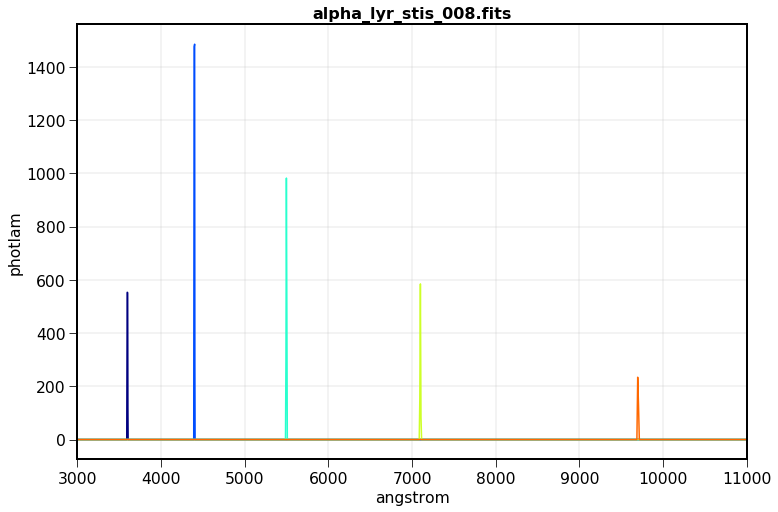

In [112]:
idx=0
for theobs in all_obs:
    plt.plot(theobs.binwave,theobs.binflux,color=all_colors[idx])
    idx+=1
    
plt.xlabel(theobs.waveunits)
plt.ylabel(theobs.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()
#plt.legend()

# Results in filter bands

Units are defined in 
https://pysynphot.readthedocs.io/en/latest/units.html#pysynphot-units-counts-mags

## Countrate

In [113]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, count-rate=",theobs.countrate()," photons/cm$^2$/s/nm")
    print("wl=",filt_wlcenter[idx]," A, \t ==> instrum magnitude=",-2.5*np.log10(theobs.countrate())," obmag")
    idx+=1

wl= 3600.0  A, count-rate= 62460626.45050162  photons/cm$^2$/s/nm
wl= 3600.0  A, 	 ==> instrum magnitude= -19.489015839209983  obmag
wl= 4400.0  A, count-rate= 167422860.4734299  photons/cm$^2$/s/nm
wl= 4400.0  A, 	 ==> instrum magnitude= -20.559536894292748  obmag
wl= 5500.0  A, count-rate= 111048084.79691792  photons/cm$^2$/s/nm
wl= 5500.0  A, 	 ==> instrum magnitude= -20.11377768210311  obmag
wl= 7100.0  A, count-rate= 66124186.77956255  photons/cm$^2$/s/nm
wl= 7100.0  A, 	 ==> instrum magnitude= -19.55090085989278  obmag
wl= 9700.0  A, count-rate= 39916682.720322564  photons/cm$^2$/s/nm
wl= 9700.0  A, 	 ==> instrum magnitude= -19.002886105077856  obmag


## OBmag : Instrumental magnitude

the instrumental magnitude that is the logarithmic form of counts
https://pysynphot.readthedocs.io/en/latest/units.html#pysynphot-units-counts-mags

In [114]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, magnitude in obmag units = ",theobs.effstim("obmag"),"obmag")
    idx+=1

wl= 3600.0  A, magnitude in obmag units =  -19.489015839209983 obmag
wl= 4400.0  A, magnitude in obmag units =  -20.559536894292748 obmag
wl= 5500.0  A, magnitude in obmag units =  -20.11377768210311 obmag
wl= 7100.0  A, magnitude in obmag units =  -19.55090085989278 obmag
wl= 9700.0  A, magnitude in obmag units =  -19.002886105077856 obmag


## VEGAmag

In [115]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, magnitude in vega units = ",theobs.effstim("vegamag"),"vegamag")
    idx+=1

wl= 3600.0  A, magnitude in vega units =  0.0 vegamag
wl= 4400.0  A, magnitude in vega units =  0.0 vegamag
wl= 5500.0  A, magnitude in vega units =  0.0 vegamag
wl= 7100.0  A, magnitude in vega units =  0.0 vegamag
wl= 9700.0  A, magnitude in vega units =  0.0 vegamag


## ABmag

In [116]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, magnitude in abmag units = ",theobs.effstim("abmag"),"abmag")
    idx+=1

wl= 3600.0  A, magnitude in abmag units =  1.1006996982861121 abmag
wl= 4400.0  A, magnitude in abmag units =  -0.18769730105875304 abmag
wl= 5500.0  A, magnitude in abmag units =  0.015786463607524226 abmag
wl= 7100.0  A, magnitude in abmag units =  0.30142379570879285 abmag
wl= 9700.0  A, magnitude in abmag units =  0.5106547983873266 abmag


## STmag

In [117]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, magnitude in stmag units = ",theobs.effstim("stmag"),"stmag")
    idx+=1

wl= 3600.0  A, magnitude in stmag units =  0.19015673073212191 stmag
wl= 4400.0  A, magnitude in stmag units =  -0.6624886108772454 stmag
wl= 5500.0  A, magnitude in stmag units =  0.025545880591012704 stmag
wl= 7100.0  A, magnitude in stmag units =  0.8656620732935458 stmag
wl= 9700.0  A, magnitude in stmag units =  1.7524604969216409 stmag
